# Importing libraries

In [1]:
# Load libraries
import sklearn.datasets
import numpy as np
import pandas as pd

# Loading the data

In [2]:
# Data loading and exploration
breast_cancer = sklearn.datasets.load_breast_cancer()
X = breast_cancer.data
Y = breast_cancer.target
data  = pd.DataFrame(X, columns=breast_cancer.feature_names)
data['class'] = Y
# Feature names and target class names
print(breast_cancer.target_names)
print(breast_cancer.feature_names)

['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


# Train test split

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# Convert data back to numpy arrays
X = data.drop('class',axis=1)
Y = data['class']

In [86]:
# Split the data in training and test set wit 90/10 ratio 
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.1, stratify = Y, random_state=1)
print(X.shape, X_train.shape, X_test.shape)
print(type(Y_train))

(569, 30) (512, 30) (57, 30)
<class 'pandas.core.series.Series'>


In [54]:
# Check whether the split is statistically equivalent
print(Y.mean(), Y_train.mean(), Y_test.mean())

0.6274165202108963 0.626953125 0.631578947368421


# Binarizing the inputs

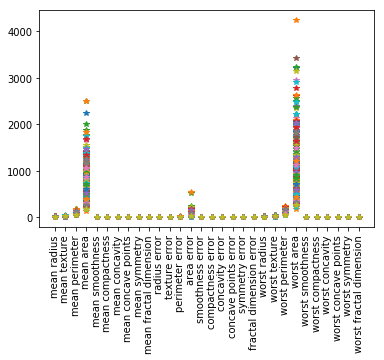

In [55]:
# Plot the data to see at what point should we split the dataset
import matplotlib.pyplot as plt
plt.plot(X.T,'*')
plt.xticks(rotation='vertical')
plt.show()

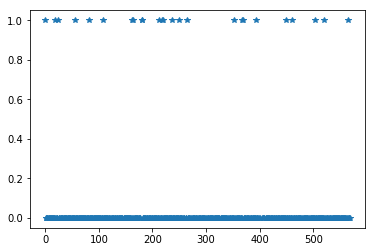

In [56]:
# Do binarization on one column only
X_train_worst_area_binarization = X_train['worst area'].map(lambda x:0 if x<2000 else 1)
plt.plot(X_train_worst_area_binarization,'*')

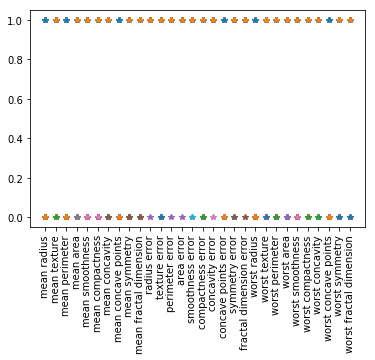

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
430,1,1,1,1,1,0,0,0,1,1,...,1,1,1,1,1,0,0,0,1,1
48,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
105,1,1,1,1,0,1,1,0,1,0,...,1,1,1,1,0,1,0,0,1,0
467,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
547,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [57]:
# Applying binarization to the entire dataset
X_train_binarized = X_train.apply(pd.cut, bins = 2, labels = [1,0])
plt.plot(X_train_binarized.T,'*')
plt.xticks(rotation='vertical')
plt.show()
X_train_binarized.head()

In [58]:
X_test_binarized = X_test.apply(pd.cut, bins = 2, labels = [1,0])

In [59]:
# Get the train data as numpy arrays
X_train_binarized = X_train_binarized.values
Y_train = Y_train.values
X_test_binarized = X_test_binarized.values
Y_test = Y_test.values

# MP Neuron

In [60]:
# If the sum of binarized features is greater than b, predicted value is 1 
b = 3
i = 100
if (np.sum(X_train_binarized[i,:])>=b):
    print('Predicted value is Malignant')
else:
    print('Predicted value is Benign')
    
if (Y_train[i] == 1):
    print('Ground Truth is Malignant')
else:
    print('Ground Truth is Benign')

Predicted value is Malignant
Ground Truth is Malignant


In [63]:
# Generalizing MP neuron model for all values of 'b' and all rows of the training data 
for b in range(X_train_binarized.shape[1]+1):
    Y_train_pred = []
    accurate_rows = 0
    for x,y in zip(X_train_binarized,Y_train):
        y_pred = (np.sum(x)>=b)
        Y_train_pred.append(Y_pred)
        accurate_rows += (y_pred == y)
    print(b, accurate_rows/X_train_binarized.shape[0])


0 0.626953125
1 0.626953125
2 0.626953125
3 0.626953125
4 0.626953125
5 0.626953125
6 0.626953125
7 0.626953125
8 0.626953125
9 0.626953125
10 0.626953125
11 0.626953125
12 0.626953125
13 0.626953125
14 0.630859375
15 0.6328125
16 0.642578125
17 0.6484375
18 0.65625
19 0.6640625
20 0.671875
21 0.6875
22 0.701171875
23 0.724609375
24 0.755859375
25 0.78515625
26 0.818359375
27 0.845703125
28 0.849609375
29 0.814453125
30 0.759765625


In [70]:
from sklearn.metrics import accuracy_score 

In [71]:
# Inference on test data
b = 28
Y_test_pred = []
for x in X_test_binarized:
    y_pred = (np.sum(x)>=b)
    Y_test_pred.append(Y_pred)
print(b, accuracy_score(Y_test_pred, Y_test))

28 0.631578947368421


In [81]:
class MPNEURON():
    def __init__(self):
        self.b = None
    def model(self, x):
        return (sum(x)>= self.b)
    def predict(self, X):
        Y = []
        for x in X:
            Y.append(self.model(x))
        return Y
    def fit(self, X, Y):
        accuracy = {}
        for b in range(X.shape[1]):
            self.b = b
            Y_pred = self.predict(X)
            accuracy[b] = accuracy_score(Y_pred, Y)
        self.b = max(accuracy, key=accuracy.get)
        print('The best parameter is ',self.b)
        print('Best accuracy is ',accuracy[self.b])

In [83]:
mp_neuron = MPNEURON()
mp_neuron.fit(X_train_binarized, Y_train)

The best parameter is  28
Best accuracy is  0.849609375


In [100]:
X_train = X_train.values
X_test = X_test.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

# Peceptron class
$y = 1, \mbox{if} \sum_{i=1}^n w_ix_i >= b$

$y=0, \mbox{otherwise}$

In [130]:
class Perceptron():
    def __init__(self): # This functions contains the model parameters
        self.w = None
        self.b = None
        
    def model(self, x): # This function evlauates our model
        return 1 if (np.dot(self.w,x)>=self.b) else 0
    
    def predict(self, X): # This function predicts Y at rows of X 
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)
    
    def fit(self, X, Y, epochs = 1, lr = 1): # This function implements the learning algorithm
        self.w = np.ones(X.shape[1])
        self.b = 0
        accuracy = {}
        max_accuracy = 0
        
        wt_matrix = []
        
        for i in range(epochs): # epoch is a hyperparameter of the model
            for x,y in zip(X,Y):
                y_pred = self.model(x)
                if y == 1 and y_pred == 0:
                    self.w = self.w + lr*x
                    self.b = self.b + lr*1
                if y == 0 and y_pred == 1:
                    self.w = self.w - lr*x
                    self.b = self.b - lr*1
            accuracy[i] = accuracy_score(self.predict(X),Y)
            if accuracy[i] > max_accuracy:
                max_accuracy = accuracy[i]
                chkptw = self.w
                chkptb = self.b
            wt_matrix.append(self.w)
            
        self.w = chkptw
        self.b = chkptb
        print('Maximum accuracy is ', max_accuracy)
        plt.plot(accuracy.values())
        plt.ylim([0,1])
        plt.show()
        
        return np.array(wt_matrix)
        

Maximum accuracy is  0.927734375


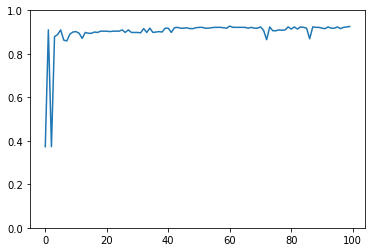

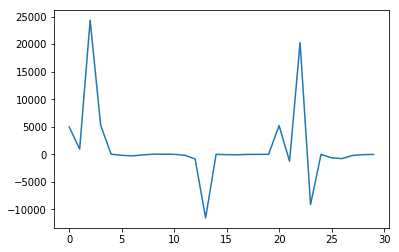

In [134]:
perceptron = Perceptron()
wt_matrix = perceptron.fit(X_train, Y_train, epochs = 100)
plt.plot(wt_matrix[-1,:])
plt.show()

In [132]:
Y_train_pred = perceptron.predict(X_train)
print(accuracy_score(Y_train_pred, Y_train))

0.939453125


In [137]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

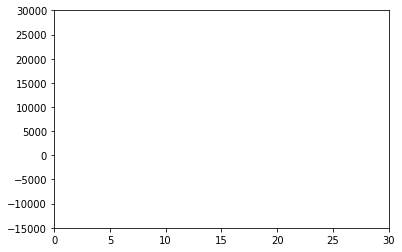

In [138]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, wt_matrix.shape[1]))
ax.set_ylim((-15000, 30000))

line, = ax.plot([], [], lw=2)

In [139]:
# animation function. This is called sequentially
def animate(i):
    x = list(range(wt_matrix.shape[1]))
    y = wt_matrix[i,:]
    line.set_data(x, y)
    return (line,)

In [143]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=100, interval=20, blit=True)

In [144]:
HTML(anim.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available